In [1]:
from __future__ import absolute_import, division, print_function

import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected, flatten
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression
import matplotlib.pyplot as plt
import numpy as np
import tflearn.datasets.mnist as mnist
from PIL import Image

In [2]:
# MNIST Data
X, Y, testX, testY = mnist.load_data(one_hot=True)
X = X.reshape([-1, 28, 28, 1])
testX = testX.reshape([-1, 28, 28, 1])

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


/home/ankdesh/installed/anaconda2/envs/tf0.11/lib/python2.7/gzip.py:275: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  chunk = self.extrabuf[offset: offset + size]
/home/ankdesh/installed/anaconda2/envs/tf0.11/lib/python2.7/site-packages/tflearn/datasets/mnist.py:52: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  data = data.reshape(num_images, rows, cols, 1)


In [3]:
# Building convolutional network
network = input_data(shape=[None, 28, 28, 1], name='input')
conv2d_1 = conv_2d(network, 32, 5, activation='relu', regularizer="L2")
network = max_pool_2d(conv2d_1, 2)
network = local_response_normalization(network)
conv2d_2 = conv_2d(network, 64, 5, activation='relu', regularizer="L2")
network = max_pool_2d(conv2d_2, 2)
network = local_response_normalization(network)
conv2d_3 = conv_2d(network, 64, 5, activation='relu', regularizer="L2")
network = max_pool_2d(conv2d_3, 2)
network = local_response_normalization(network)
softmax = fully_connected(network, 10, activation='softmax')
network = regression(softmax, optimizer='adam', learning_rate=0.01,
                     loss='categorical_crossentropy', name='target')

In [4]:
model = tflearn.DNN(network)

In [5]:
model.fit(X, Y, n_epoch=5,
          validation_set=(testX, testY),
          show_metric=True,
          run_id='model_and_weights')

Training Step: 4300  | total loss: 0.07582
| Adam | epoch: 005 | loss: 0.07582 - acc: 0.9774 | val_loss: 0.07197 - val_acc: 0.9766 -- iter: 55000/55000
Training Step: 4300  | total loss: 0.07582
| Adam | epoch: 005 | loss: 0.07582 - acc: 0.9774 | val_loss: 0.07197 - val_acc: 0.9766 -- iter: 55000/55000
--


In [6]:
conv1_weights = model.get_weights(conv2d_1.W)
conv2_weights = model.get_weights(conv2d_2.W)
conv3_weights = model.get_weights(conv2d_3.W)
softmax_weights = model.get_weights(softmax.W)

In [7]:
print ((conv1_weights.shape))
print ((conv2_weights.shape))
print ((conv3_weights.shape))
print ((softmax_weights.shape))

(5, 5, 1, 32)
(5, 5, 32, 64)
(5, 5, 64, 64)
(1024, 10)


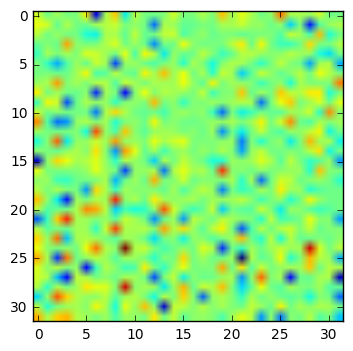

In [11]:
%matplotlib inline
plt.imshow(softmax_weights.reshape(32,32,10)[:,:,8])

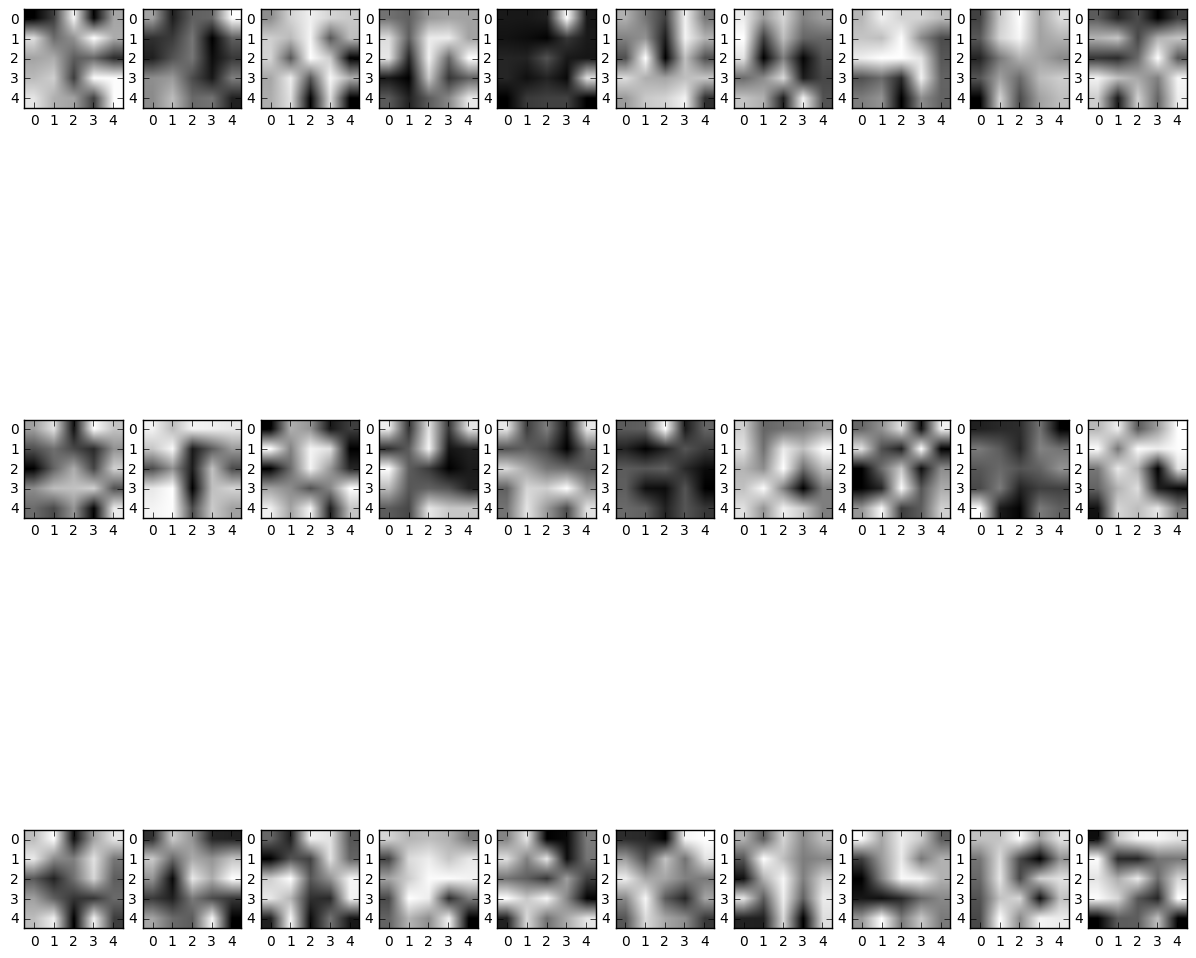

In [33]:
%matplotlib inline
imgs = [] # Stores name of files  
f,ax = plt.subplots(3,10, figsize=(15,15))
for j in range(3):
    for i in range(10):
        ax[j][i].imshow(conv2_weights[:,:,0,j*10+i], cmap="Greys_r" )
plt.show() # or display.display(plt.gcf()) if you prefer

#plt.imshow(conv2_weights[:,:,1,1].reshape(5,5))